 # Predicting Customer Lifetime Value

- past purchase history of customers 
- build a model that can predict the Customer Lifetime Value (CLV) for new customers

## Libraries and data

In [23]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os

# visualization
import matplotlib.pylab as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 8,6

# ML
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics

In [4]:
df = pd.read_csv("history.csv")
df.dtypes

CUST_ID    int64
MONTH_1    int64
MONTH_2    int64
MONTH_3    int64
MONTH_4    int64
MONTH_5    int64
MONTH_6    int64
CLV        int64
dtype: object

In [7]:
df.head()

,CUST_ID,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,CLV
0,1001,150,75,200,100,175,75,13125
1,1002,25,50,150,200,175,200,9375
2,1003,75,150,0,25,75,25,5156
3,1004,200,200,25,100,75,150,11756
4,1005,200,200,125,75,175,200,15525


In [6]:
df.columns

Index(['CUST_ID', 'MONTH_1', 'MONTH_2', 'MONTH_3', 'MONTH_4', 'MONTH_5',
       'MONTH_6', 'CLV'],
      dtype='object')

* customer ID
* the amount the customer spent 
* customer life time value based on the length to which your customers stay with your business

In [4]:
raw_data.head()

,CUST_ID,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,CLV
0,1001,150,75,200,100,175,75,13125
1,1002,25,50,150,200,175,200,9375
2,1003,75,150,0,25,75,25,5156
3,1004,200,200,25,100,75,150,11756
4,1005,200,200,125,75,175,200,15525


## Correlation Analysis

In [10]:
cleaned_data = df.drop("CUST_ID",axis=1)
cleaned_data .corr()['CLV']

MONTH_1    0.734122
MONTH_2    0.250397
MONTH_3    0.371742
MONTH_4    0.297408
MONTH_5    0.376775
MONTH_6    0.327064
CLV        1.000000
Name: CLV, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

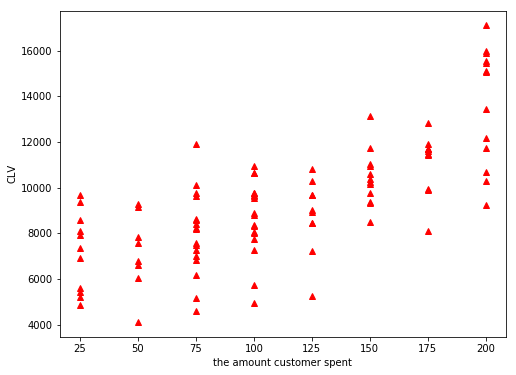

In [28]:
# plt.plot(x,y,shape)
plt.plot(df['MONTH_1'],df['CLV'],'r^')
plt.xlabel('the amount customer spent')
plt.ylabel('CLV')
plt.show

* strong correlation to the target variable (CLV) 
* build a strong model to predict the CLV

## Training & Testing Split

In [12]:
x = cleaned_data.drop("CLV",axis=1)
y = cleaned_data.CLV

x_train, x_test, y_train, y_test  =   train_test_split(x, y, test_size=.1)
print( "Predictor - Training : ", x_train.shape, "Predictor - Testing : ", x_test.shape )

Predictor - Training :  (90, 6) Predictor - Testing :  (10, 6)


## Build & Test Model
* Linear Regression equation for predicting CLV 
* its accuracy by predicting against the test dataset

### build model on training data


In [14]:
model = LinearRegression()
model.fit(x_train, y_train)  # fit the model
print('Coefficients: \n', model.coef_)
print('Intercept: \n', model.intercept_)

Coefficients: 
 [34.53684334 11.31174318 15.48514613 11.7502334   7.02184849  6.00282105]
Intercept: 
 -123.5170072258843


### Test on testing data

In [29]:
predictions = model.predict(x_test)
predictions

sklearn.metrics.r2_score(y_test, predictions)

0.9449227415013178

It shows a 94% accuracy. 

## Predicting for a new Customer
* a new customer who in his first 3 months have spend 100,0,50.

In [31]:
# reshape(-1,정수) : col의 갯수가 정해지면 row의 갯수가 정해짐
# 12개원소 x : x.reshape(-1,3) > shape(4,3)
# reshape(정수,-1) : row 정수가 정해지면 col의 개수가 정해짐
# 12개원소 x : x.reshape(3,1) > shape(3,4)
new = np.array([100,0,50,0,0,0]).reshape(1, -1)
new

array([[100,   0,  50,   0,   0,   0]])

In [32]:
new_pred=model.predict(new) 

In [33]:
print("The CLV for the new customer is : $",new_pred[0])

The CLV for the new customer is : $ 4104.424633416935


# Grouping Similar Problems

- group customer support problems into problem groups based on their attributes
- similarities and differences.

## Libraries and data

In [80]:
import pandas as pd
import numpy as np
import os
from pandas import Series, DataFrame

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import sklearn.metrics

df =pd.read_csv('issues.csv')

In [37]:
df.dtypes

PROBLEM_TYPE             object
COUNT                     int64
AVG_CALLS_TO_RESOLVE    float64
AVG_RESOLUTION_TIME       int64
REOCCUR_RATE            float64
REPLACEMENT_RATE        float64
dtype: object

* unique problem type
* metrics for each type like count, average calls to resolve, average resolution time etc.

In [42]:
df.head()

,PROBLEM_TYPE,COUNT,AVG_CALLS_TO_RESOLVE,AVG_RESOLUTION_TIME,REOCCUR_RATE,REPLACEMENT_RATE
0,Admin Password Lost,45,2.3,54,0.15,0.00
1,Windows Reboots automatically,47,3.1,132,0.30,0.03
2,System not coming up after reboot,12,4.0,154,0.02,0.05
3,Slow system,165,1.2,32,0.03,0.00
4,Internet Connectivity loss,321,1.0,5,0.21,0.00


## Group Data into similar clusters

* K-Means clustering to group data based on their attribute. 
    - Market Price and cost Modeling
    - Hedge Fund Classification
    - Insurance Claim Fraud Detection
    - Customer Segmentation

### Determine the optimal number of groups 

In [43]:
clust = df.drop('PROBLEM_TYPE', axis=1) # , inplace=True)

In [44]:
# finding optimal no. of clusters
from scipy.spatial.distance import cdist

In [47]:
clusters = range(1,10)
meanDistortions = []

for k in clusters :
    model = KMeans(n_clusters=k)
    model.fit(clust)
    prediction = model.predict(clust)
    meanDistortions.append(sum(np.min(cdist(clust, model.cluster_centers_,metric ='euclidean'), axis=1))/ clust.shape[0])

Text(0.5, 1.0, 'Selecting Optimal K with Elbow Method')

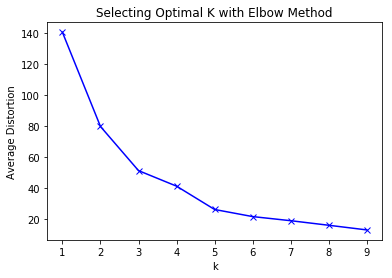

In [49]:
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting Optimal K with Elbow Method')

* optimal K = 3 

### Add the Cluster information to the original dataset

In [52]:
final_model = KMeans(n_clusters=3)
final_model.fit(clust)
prediction=final_model.predict(clust)
prediction

array([0, 0, 0, 2, 1, 0, 0, 2, 2, 0, 1, 1, 1, 2, 0, 2, 0, 0, 0, 2])

In [84]:
# join predicted clusters to the original data :: Group
df['Group'] = prediction
print('GroupAssigned : \n')
df[['Group','PROBLEM_TYPE']]

GroupAssigned : 



,Group,PROBLEM_TYPE
0,0,Admin Password Lost
1,0,Windows Reboots automatically
2,0,System not coming up after reboot
3,2,Slow system
4,1,Internet Connectivity loss
5,0,New Installation hangs
6,0,Intermittent Blank Screen
7,2,Too many popups in Browser
8,2,Cannot find printer
9,0,Missing peripheral driver


### Analyze the groups  & Insights
set of boxplots to see how the groups differ for various feature attributes.

In [121]:
df.dtypes

PROBLEM_TYPE             object
COUNT                     int64
AVG_CALLS_TO_RESOLVE    float64
AVG_RESOLUTION_TIME       int64
REOCCUR_RATE            float64
REPLACEMENT_RATE        float64
Group                     int32
dtype: object

Text(0.5, 1.0, 'K-Means Classification')

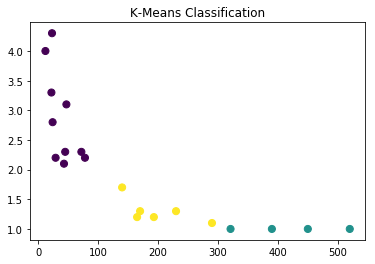

In [101]:
# clear current axes
plt.cla()
plt.scatter(x=df['COUNT'], y=df['AVG_CALLS_TO_RESOLVE'],
           c=df['Group'], s = 50)
plt.title('K-Means Classification')

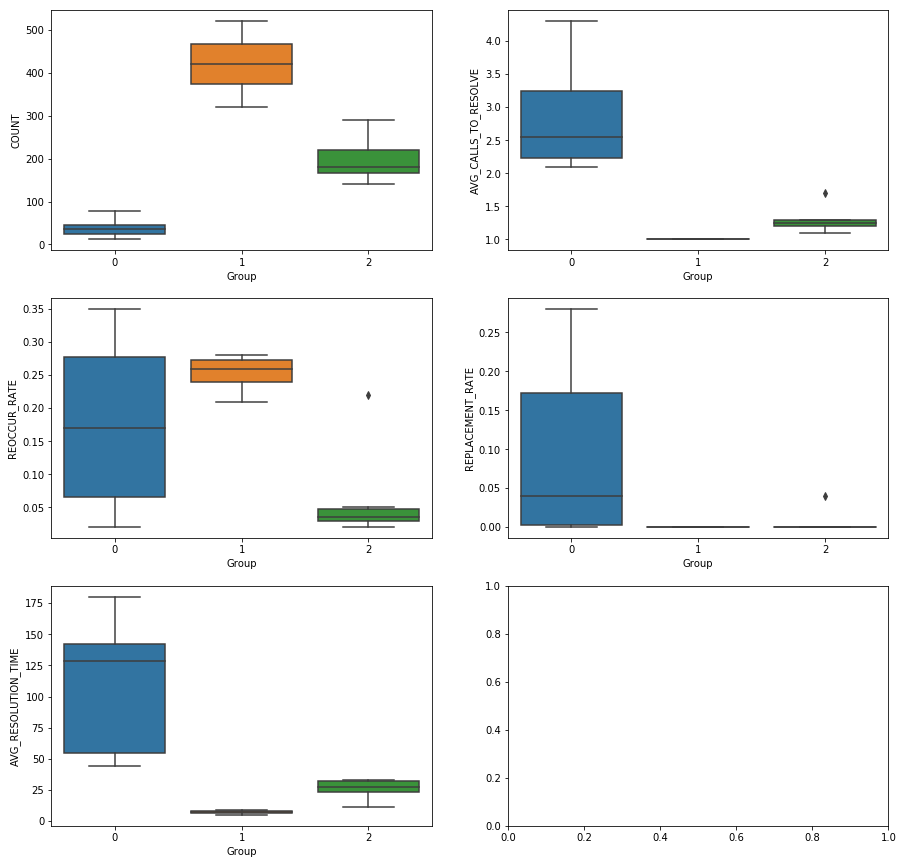

In [120]:
f, ax=plt.subplots(figsize=(15,15),nrows=3,ncols=2)
sns.boxplot(data=df, x='Group', y= 'COUNT', ax=ax[0, 0])
sns.boxplot(data=df, x='Group', y= 'AVG_CALLS_TO_RESOLVE', ax=ax[0, 1])
sns.boxplot(data=df, x='Group', y= 'REOCCUR_RATE', ax=ax[1, 0])
sns.boxplot(data=df, x='Group', y= 'REPLACEMENT_RATE', ax=ax[1, 1])
sns.boxplot(data=df, x='Group', y= 'AVG_RESOLUTION_TIME', ax=ax[2, 0])

* Group 1 has really high reoccurance rate, count > Quality Check Requried
* Group 1 has hardly any time needed to resolve > problems might be simple
* Replacement rates vary widely for Group 0

# Discovering customer attrition patterns

## Libraries and data

In [124]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os

import matplotlib.pylab as plt
# ! pip install apyori
from apyori import apriori

df3 = pd.read_csv('attrition.csv')
df3.head()

,LIFETIME,TYPE,REASON,AGE_GROUP,EMP_STATUS,MARITAL_STATUS,RENEWALS,PROBLEMS,OFFERS
0,1 - 3 M,CANCEL,BETTER DEALS,< 20,STUDENT,SINGLE,0,0 to 5,0 to 2
1,1 - 3 M,CANCEL,BETTER DEALS,< 20,STUDENT,SINGLE,0,0 to 5,0 to 2
2,1Y - 2Y,CANCEL,NOT HAPPY,30 - 50,EMPLOYED,MARRIED,1,10 plus,0 to 2
3,1Y - 2Y,EXPIRY,BETTER DEALS,30 - 50,EMPLOYED,MARRIED,1,0 to 5,2 to 5
4,1Y - 2Y,CANCEL,NOT HAPPY,30 - 50,UNEMPLOYED,SINGLE,1,10 plus,0 to 2


## Transfom the data format >> market basket format

In [126]:
basket_str=''

for rowNum, row in df3.iterrows() :
    #break lines
    if (rowNum!=0) :
        basket_str = basket_str + '\n'
    #add the rowid as the first col
    basket_str = basket_str + str(rowNum)
    #add Columns
    for colName, col in row.iteritems():
        basket_str = basket_str + ",\"" + colName + "=" + str(col) + "\""    

In [142]:
#print(basket_str)

In [143]:
basket_file = open('warranty_basket.csv','w')
basket_file.write(basket_str)
basket_file.close

<function TextIOWrapper.close()>

## Build Association Rules

## Using the Rules